# 1. Load Data

In [814]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [815]:
# Load dataset Train
nRowsRead = None
df = pd.read_csv('dataset/fraudTrain.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'fraudTrain.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1296675 rows and 23 columns


In [816]:
# Load dataset Test
nRowsRead = None
df2 = pd.read_csv('dataset/fraudTest.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'fraudTest.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 555719 rows and 23 columns


In [817]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [818]:
# Combine train and test datasets
df = pd.concat([df, df2])

In [819]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [820]:
df.shape

(1852394, 23)

In [821]:
df = df.drop(columns='Unnamed: 0')


In [822]:
# Convert the given Unix time to datetime (assuming standard Unix Epoch)
unix_time_standard = 1325376018
standard_datetime = pd.to_datetime(unix_time_standard, unit='s')
print("Standard Datetime:", standard_datetime)

# Provided actual datetime in the dataset
dataset_actual_datetime = pd.Timestamp("2019-01-01 00:00:18")

# Calculate the offset
offset = (dataset_actual_datetime - standard_datetime).total_seconds()
print("Offset in seconds:", offset)

Standard Datetime: 2012-01-01 00:00:18
Offset in seconds: 220924800.0


In [823]:
offset = 220924800  # the actual calculated offset
df['unix_time'] = df['unix_time'] + offset

# # Compare adjusted unix_time and trans_date_trans_time
# df['datetime_from_unix'] = pd.to_datetime(df['adjusted_unix_time'], unit='s')
print(df[['unix_time']].head())

    unix_time
0  1546300818
1  1546300844
2  1546300851
3  1546300876
4  1546300986


In [824]:
# Process DOB into age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1546300818,36.011293,-82.048315,0,36
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1546300844,49.159047,-118.186462,0,46
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1546300851,43.150704,-112.154481,0,63
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1546300876,47.034331,-112.561071,0,58
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1546300986,38.674999,-78.632459,0,38


In [825]:
import json

def save_unique_features_to_json(df, columns, output_file):
    """
    Extract unique features from specified columns in a DataFrame and save to a JSON file.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: List of column names to extract unique features from.
    - output_file: Name of the JSON file to save the output.

    Returns:
    - None
    """
    unique_features = {}
    for col in columns:
        unique_features[col] = df[col].dropna().unique().tolist()

    # Save the dictionary to a JSON file
    with open(output_file, 'w') as json_file:
        json.dump(unique_features, json_file, indent=4)

    print(f"Unique features saved to {output_file}")


# Specify columns you want to extract unique features from
columns_to_extract = ['category', 'gender', 'city']

# Call the function to save unique features to a JSON file
save_unique_features_to_json(df, columns_to_extract, 'unique_features.json')


Unique features saved to unique_features.json


# 2. Explore the Dataset

#### View dataset structure

In [109]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1546300818,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1546300844,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1546300851,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1546300876,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1546300986,38.674999,-78.632459,0


In [568]:
# Filter rows where is_fraud = 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the resul
print(fraudulent_transactions.head())

     trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   
2523   2019-01-02 03:05:23  340187018810220            fraud_Goodwin-Nitzsche   
2546   2019-01-02 03:38:03    4613314721966            fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220                fraud_Koepp-Parker   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   
2523    grocery_pos  276.31  Misty    Hart      F  27954 Hall Mill Suite 575   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   

               city  ...      la

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  90000 non-null  object 
 1   cc_num                 90000 non-null  int64  
 2   merchant               90000 non-null  object 
 3   category               90000 non-null  object 
 4   amt                    90000 non-null  float64
 5   first                  90000 non-null  object 
 6   last                   90000 non-null  object 
 7   gender                 90000 non-null  object 
 8   street                 90000 non-null  object 
 9   city                   90000 non-null  object 
 10  state                  90000 non-null  object 
 11  zip                    90000 non-null  int64  
 12  lat                    90000 non-null  float64
 13  long                   90000 non-null  float64
 14  city_pop               90000 non-null  int64  
 15  jo

#### Check for missing values

In [114]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Summary statistics

In [115]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9.000000e+04,90000.000000,90000.000000,90000.000000,90000.000000,9.000000e+04,9.000000e+04,90000.000000,90000.000000,90000.000000
mean,4.183803e+17,70.897983,48590.159322,38.531088,-90.123681,8.984649e+04,1.562941e+09,38.529716,-90.126362,0.007889
std,1.310653e+18,147.875291,26896.141336,5.072544,13.747025,3.031971e+05,2.137980e+07,5.105753,13.759873,0.088469
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.546301e+09,19.040141,-166.670132,0.000000
25%,1.800429e+14,9.660000,25526.000000,34.668900,-96.743000,7.430000e+02,1.547460e+09,34.755536,-96.814450,0.000000
50%,3.519233e+15,47.360000,48088.000000,39.354300,-87.456900,2.457000e+03,1.548618e+09,39.361703,-87.352568,0.000000
75%,4.635331e+15,83.310000,72011.000000,41.894800,-80.124800,2.047800e+04,1.592910e+09,41.934183,-80.148986,0.000000
max,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.593561e+09,66.669356,-66.955602,1.000000


#### Class distribution

In [832]:
# Class distribution
print(df['is_fraud'].value_counts())
# Class distribution percentage
print(df['is_fraud'].value_counts(normalize=True) * 100)

0    1842743
1       9651
Name: is_fraud, dtype: int64
0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


Text(0.5, 1.0, '% of Fraudulent vs Non-fraudulent transactions')

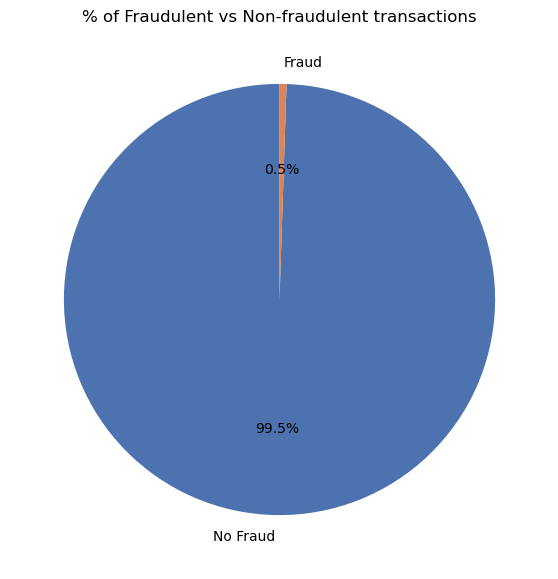

In [833]:
df['is_fraud_cat'] = df['is_fraud'].apply(lambda x: "Fraud" if x==1 else "No Fraud")

is_fraud_values = df['is_fraud_cat'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(is_fraud_values, labels=is_fraud_values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep", n_colors=len(is_fraud_values)))
plt.title('% of Fraudulent vs Non-fraudulent transactions')

#### Visualite Date

In [117]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    import numpy as np
    import matplotlib.pyplot as plt
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # For displaying purposes, pick columns with 1-50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensure it's an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)
    plt.show()

#### Correlation Matrix

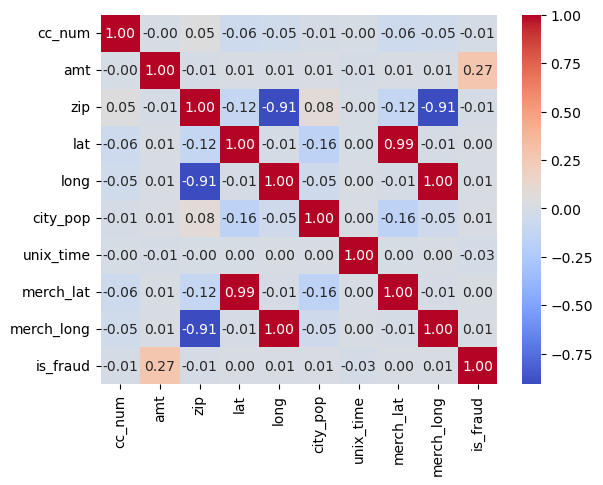

In [118]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

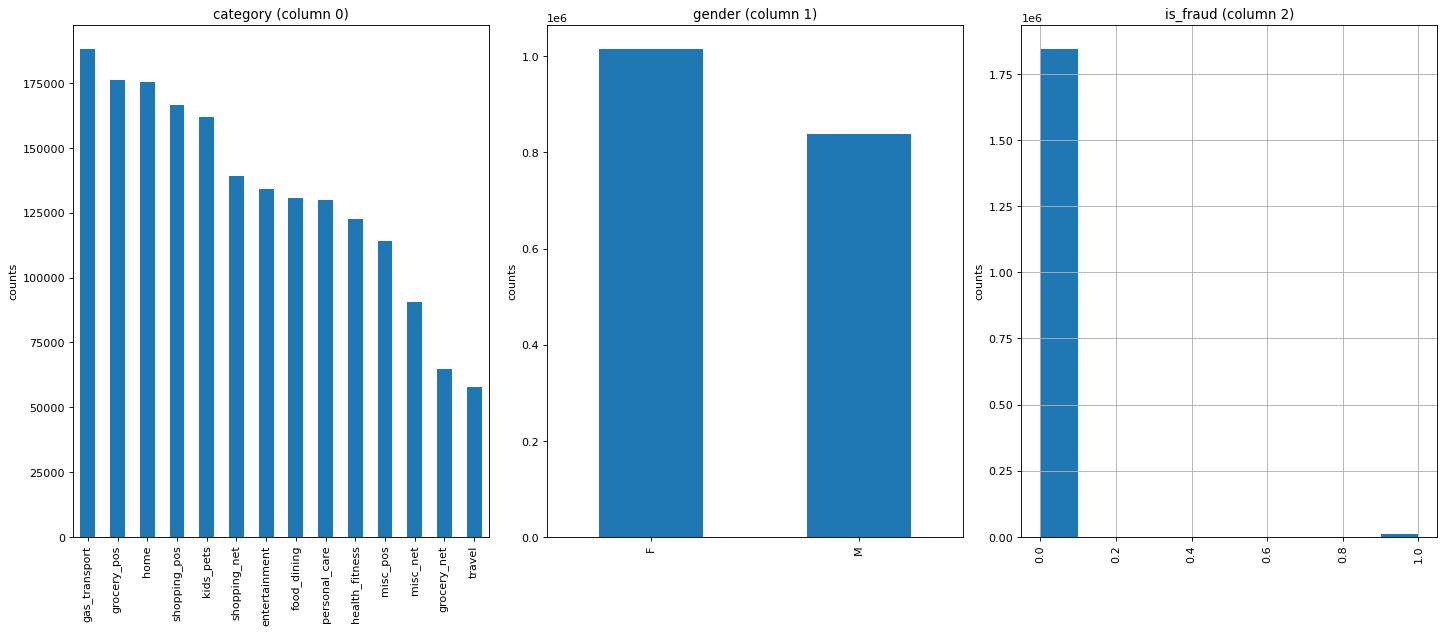

In [171]:
plotPerColumnDistribution(df, 10, 5)

In [828]:
# Compute correlation with the target
correlation_with_target = df.corr()['is_fraud'].sort_values(ascending=True)

# Print correlations
print(correlation_with_target)

# Remove features with very low correlation (threshold example: abs(correlation) < 0.01)
low_correlation_features = correlation_with_target[abs(correlation_with_target) < 0.01].index
print(f"Features to remove due to low correlation: {low_correlation_features}")

unix_time    -0.013329
zip          -0.002190
cc_num       -0.001125
city_pop      0.000325
merch_long    0.000999
long          0.001022
merch_lat     0.002778
lat           0.002904
age           0.011126
amt           0.209308
is_fraud      1.000000
Name: is_fraud, dtype: float64
Features to remove due to low correlation: Index(['zip', 'cc_num', 'city_pop', 'merch_long', 'long', 'merch_lat', 'lat'], dtype='object')


In [827]:
# Find highly correlated features (threshold example: abs(correlation) > 0.9)
correlation_matrix = df.corr()
high_correlation_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.01
]

# Print highly correlated feature pairs
print(f"Highly correlated feature pairs: {high_correlation_pairs}")

Highly correlated feature pairs: [('cc_num', 'zip'), ('cc_num', 'lat'), ('cc_num', 'long'), ('cc_num', 'merch_lat'), ('cc_num', 'merch_long'), ('amt', 'is_fraud'), ('amt', 'age'), ('zip', 'cc_num'), ('zip', 'lat'), ('zip', 'long'), ('zip', 'city_pop'), ('zip', 'merch_lat'), ('zip', 'merch_long'), ('zip', 'age'), ('lat', 'cc_num'), ('lat', 'zip'), ('lat', 'long'), ('lat', 'city_pop'), ('lat', 'merch_lat'), ('lat', 'merch_long'), ('lat', 'age'), ('long', 'cc_num'), ('long', 'zip'), ('long', 'lat'), ('long', 'city_pop'), ('long', 'merch_lat'), ('long', 'merch_long'), ('long', 'age'), ('city_pop', 'zip'), ('city_pop', 'lat'), ('city_pop', 'long'), ('city_pop', 'merch_lat'), ('city_pop', 'merch_long'), ('city_pop', 'age'), ('unix_time', 'is_fraud'), ('merch_lat', 'cc_num'), ('merch_lat', 'zip'), ('merch_lat', 'lat'), ('merch_lat', 'long'), ('merch_lat', 'city_pop'), ('merch_lat', 'merch_long'), ('merch_lat', 'age'), ('merch_long', 'cc_num'), ('merch_long', 'zip'), ('merch_long', 'lat'), ('m

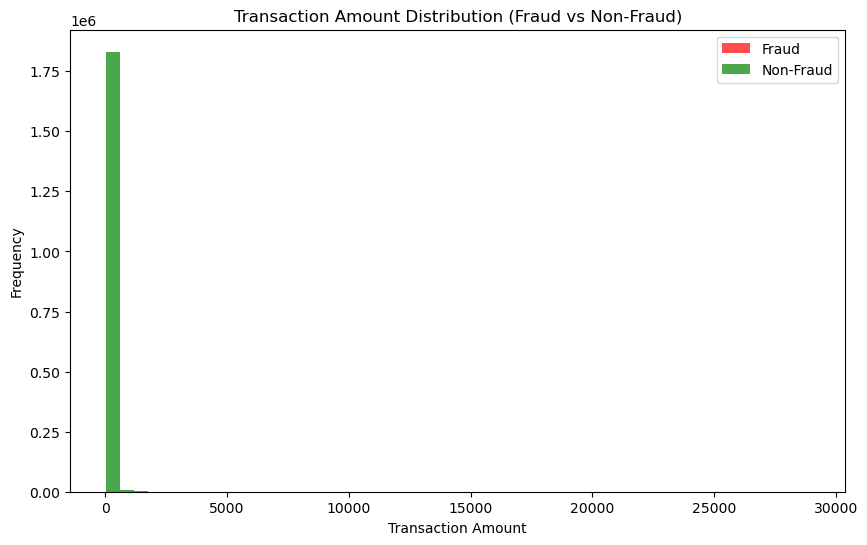

In [829]:
# Analyzing the distribution of transaction amounts for fraud vs non-fraud cases
# Identify fraud cases (assuming column 'Class' denotes fraud detection: 1 for fraud, 0 for non-fraud)
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(fraud_df['amt'], bins=50, alpha=0.7, label='Fraud', color='r')
plt.hist(non_fraud_df['amt'], bins=50, alpha=0.7, label='Non-Fraud', color='g')
plt.legend()
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

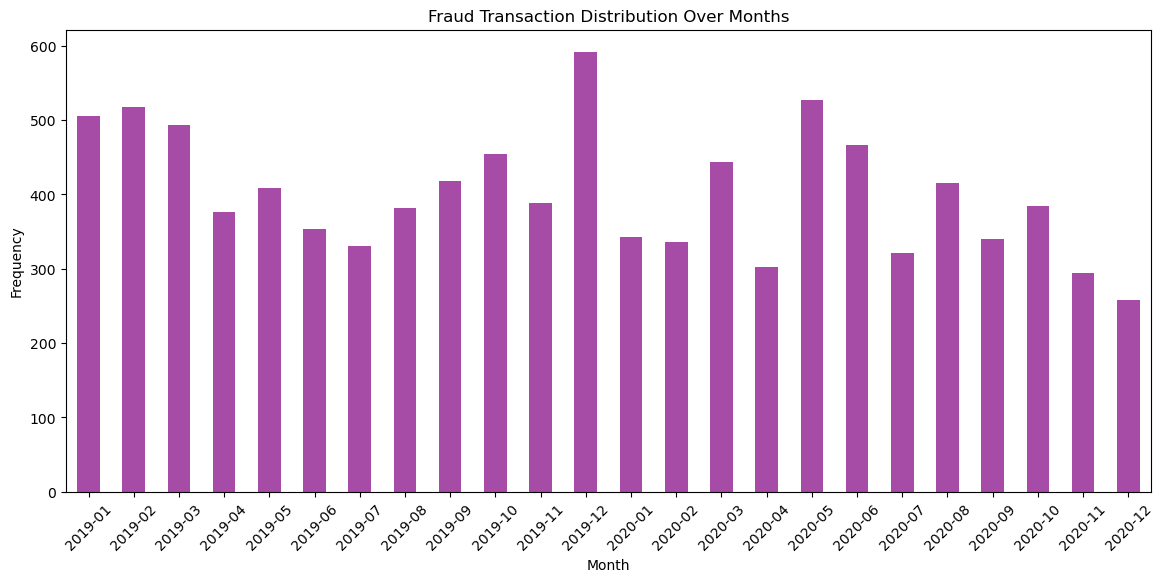

In [830]:
import random
from datetime import timedelta

# Convert 'trans_date_trans_time' to datetime (no unit needed because it's already in string datetime format)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

# Extract the month from the datetime column
fraud_df['trans_month'] = fraud_df['trans_date_trans_time'].dt.to_period('M')  # Extract month and year

plt.figure(figsize=(14, 6))
fraud_df['trans_month'].value_counts().sort_index().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Fraud Transaction Distribution Over Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

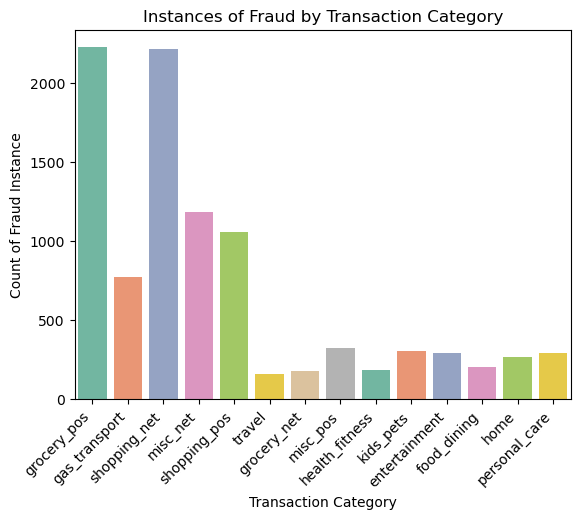

<Figure size 700x700 with 0 Axes>

In [834]:
sns.countplot(x="category", data=df[df['is_fraud_cat']=="Fraud"], palette="Set2", hue = 'category')

plt.title('Instances of Fraud by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count of Fraud Instance')
plt.xticks(rotation=45, ha = 'right')
plt.figure(figsize=(7, 7))
plt.show()

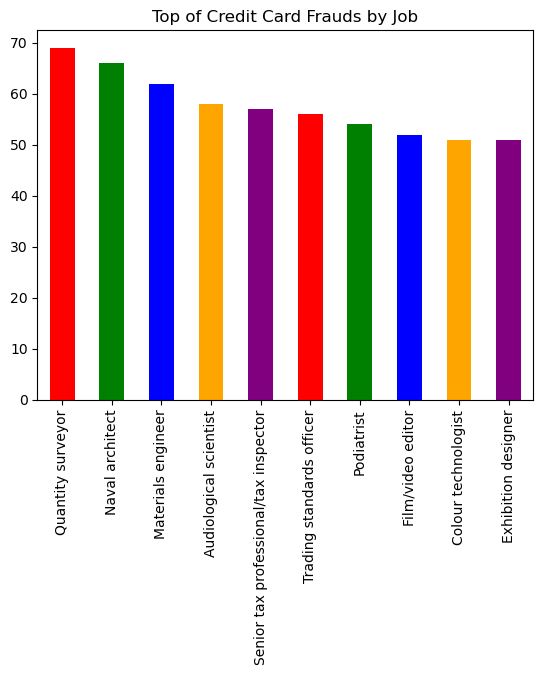

In [835]:
df[df['is_fraud_cat']=="Fraud"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",x='job', y=df['is_fraud_cat']=="Fraud", color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title("Top of Credit Card Frauds by Job")
plt.show()

# 3. Data Preprocessing

In [836]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Normalize

In [179]:
# # Normalize the 'Amount' column
# # Select numerical columns for scaling
# numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time', ]

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Apply the scaler to the numerical columns
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# # Verify the scaling
# df[numerical_columns].head()



In [180]:
# One-hot encode categorical columns
# df = pd.get_dummies(df, columns=[ 'category'], drop_first=True)
# df = pd.get_dummies(df, columns=['gender'], drop_first=True)
# df = pd.get_dummies(df, columns=['state'], drop_first=True)


df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1546300818,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1546300844,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1546300851,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1546300876,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1546300986,38.674999,-78.632459,0


In [120]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [837]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'is_fraud_cat'],
      dtype='object')

#### normalize the categorical features

In [21]:
for col in df.columns[0:]:
    print(col, ": ", len(df[col].unique()), 'labels')

trans_date_trans_time :  88703 labels
cc_num :  915 labels
merchant :  693 labels
category :  14 labels
amt :  20266 labels
first :  339 labels
last :  468 labels
gender :  2 labels
street :  915 labels
city :  841 labels
state :  50 labels
zip :  904 labels
lat :  902 labels
long :  902 labels
city_pop :  826 labels
job :  476 labels
dob :  901 labels
trans_num :  90000 labels
unix_time :  88703 labels
merch_lat :  89754 labels
merch_long :  89889 labels
is_fraud :  2 labels


In [838]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder for category
label_encoders = {}  # To save the encoders for later use (e.g., test data, web app)

In [839]:
# df_category_frequency_map = df.category.value_counts().to_dict()
# df.category = df.category.map(df_category_frequency_map)

# df['category'].unique()

In [840]:
# categorical_columns = ['merchant', 'category', 'first', 'last', 'job', 'state', 'city', 'street']

# # Apply frequency mapping to each categorical column
# for col in categorical_columns:
#     frequency_map = df[col].value_counts().to_dict()  # Create a mapping of value -> frequency
#     df[col] = df[col].map(frequency_map)             # Replace values with their frequencies


# Categorical columns to encode
categorical_columns = ['category', 'merchant','category', 'gender', 'city', 'state', 'job', 'street','gender']

# Encode each column
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Check unique values after encoding
print(df['category'].unique())

[ 8  4  0  2  9  3 11 12  1 10  5 13  7  6]


In [841]:
# Save label encoders for later use
import joblib
joblib.dump(label_encoders, 'label/label_encoders.pkl') 

['label/label_encoders.pkl']

In [842]:
df.shape

(1852394, 24)

In [ ]:
# Convert transaction date to datetime
# df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# # Extract useful datetime features
# df['trans_year'] = df['trans_date_trans_time'].dt.year
# df['trans_month'] = df['trans_date_trans_time'].dt.month
# df['trans_day'] = df['trans_date_trans_time'].dt.day
# df['trans_hour'] = df['trans_date_trans_time'].dt.hour


# # Convert 'unix_time' to datetime
# df['unix_time'] = pd.to_datetime(df['unix_time'])

# # Extract features from 'unix_time'
# df['unix_year'] = df['unix_time'].dt.year
# df['unix_month'] = df['unix_time'].dt.month
# df['unix_day'] = df['unix_time'].dt.day
# df['unix_hour'] = df['unix_time'].dt.hour


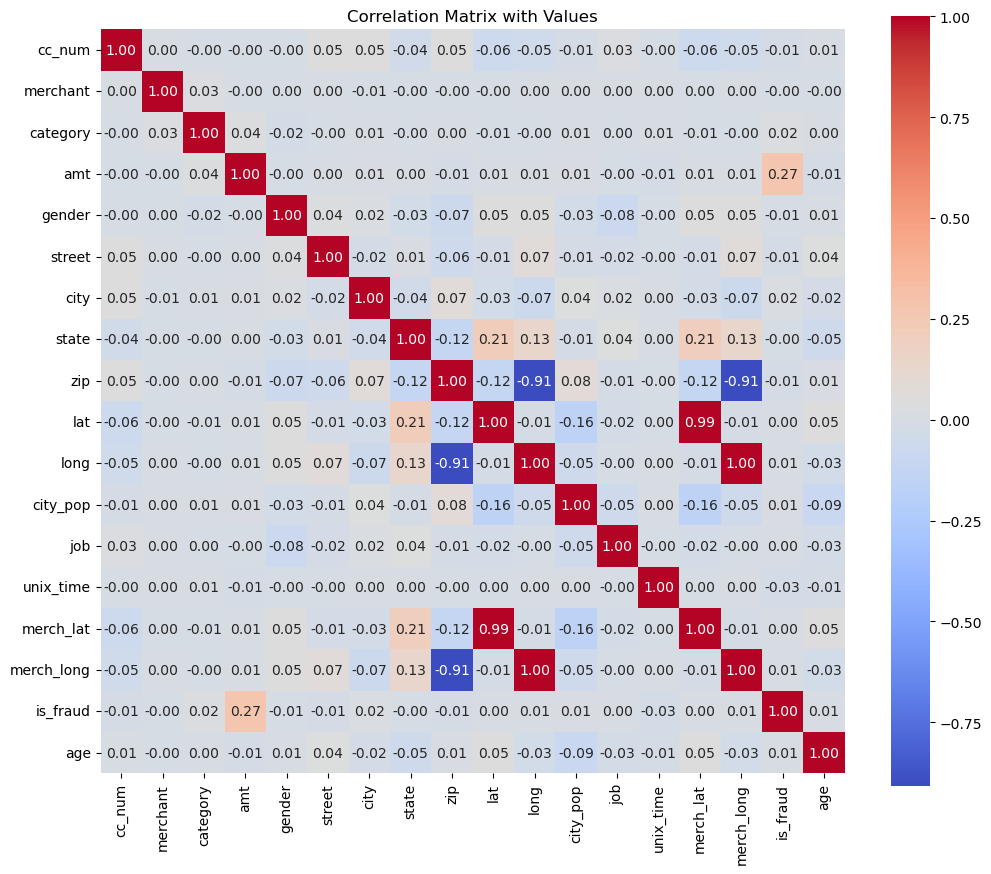

In [572]:
# # Correlation heatmap
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
# plt.show()
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix with Values")
plt.show()

### Assign features and Label

In [848]:
# Split the data into features and target
X_train  = df.reset_index(drop='index').drop(['trans_date_trans_time',  'trans_num', 'dob', 'first','last',
                    'cc_num','merchant', 'state', 'city_pop', 'street', 'merch_long', 'merch_lat','zip', 'lat', 'long', 'job', 'is_fraud', 'is_fraud_cat'], axis=1)
y_train  = df.reset_index(drop='index')['is_fraud']

In [849]:
print(X_train.dtypes)


category       int64
amt          float64
gender         int64
city           int32
unix_time      int64
age            int64
dtype: object


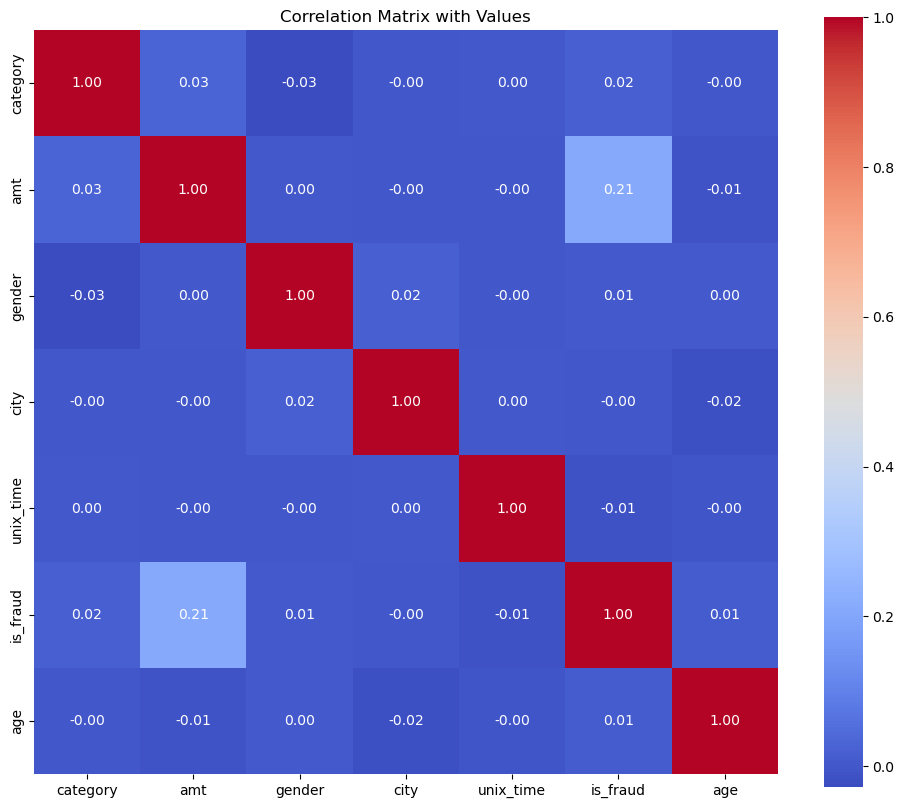

In [845]:
correlation_matrix = X_train.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix with Values")
plt.show()

In [850]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['city'], dtype='object')


### Impalance data

In [851]:
from sklearn.model_selection import train_test_split


In [852]:
# Ensure consistent train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=True)

In [853]:
### Imbalance Data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [854]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [855]:
X_train.shape

(2579924, 6)

In [856]:
print(X_scaled)

[[ 0.18682301 -0.37341485 -0.90682779 ...  0.22228173 -0.41184021
  -0.08890018]
 [-1.59803284 -0.45198278 -0.90682779 ...  0.71490635  1.21528847
  -0.08890018]
 [-0.0681564   0.11075745  1.10274521 ...  0.33003734  0.8153574
  -0.08890018]
 ...
 [-0.57811521  0.3969058  -0.90682779 ...  1.035205   -2.44278487
  -0.08890018]
 [-1.08807402  0.02290608 -0.90682779 ...  1.64070362 -1.91886596
  -0.08890018]
 [-0.83309462 -0.18235349  1.10274521 ...  0.11672998 -0.03980851
  -0.08890018]]


# 4. Models Building

## Baseline Model

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import numpy as np

In [208]:
# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
# 

In [175]:
# # Progress tracking
# progress_bar = tqdm(total=100, desc="Training Progress", unit="tree")

# # Custom loop to track training progress
# rf = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)

# for i in range(1, 101):  # Incrementally train trees
#     rf.n_estimators = i
#     rf.fit(X_train, y_train)
#     progress_bar.update(1)

# progress_bar.close()

Training Progress: 100%|██████████| 100/100 [00:23<00:00,  4.27tree/s]


In [176]:
# # Make predictions
# y_pred = rf.predict(X_test)

In [177]:
#evaluation
# print("Training Complete!")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

Training Complete!
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26777
           1       1.00      1.00      1.00     26797

    accuracy                           1.00     53574
   macro avg       1.00      1.00      1.00     53574
weighted avg       1.00      1.00      1.00     53574

Confusion Matrix:
[[26702    75]
 [   30 26767]]


## Deep Learning Model

In [857]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Layer




In [858]:
# Custom callback to print metrics during training
class PrintMetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f"Epoch {epoch + 1}, "
            f"Loss: {logs['loss']:.4f}, "
            f"Accuracy: {logs['accuracy']:.4f}, "
            f"Val Loss: {logs['val_loss']:.4f}, "
            f"Val Accuracy: {logs['val_accuracy']:.4f}"
        )

In [859]:
print(f"Shape of X_train: {X_train.shape}")


Shape of X_train: (2579924, 6)


In [860]:
print(f"Shape of scaled X_train: {X_test.shape}")


Shape of scaled X_train: (555719, 6)


In [670]:

# class CustomThresholdLayer(Layer):
#     def __init__(self, threshold=0.98, **kwargs):
#         super(CustomThresholdLayer, self).__init__(**kwargs)
#         self.threshold = threshold

#     def call(self, inputs):
#         return tf.cast(inputs >= self.threshold, tf.float64)

In [861]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),

])


In [862]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [863]:
# Model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               896       
                                                                 
 batch_normalization_32 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_33 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, 64)              

In [713]:
# # Define callbacks
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop training early if no improvement
#     ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),  # Save the best model
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)  # Adjust learning rate dynamically
# ]

In [864]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[PrintMetricsCallback()],
    verbose=1
)

Epoch 1/5
80623/80623 [==============================] - 581s 7ms/step - loss: 0.2503 - accuracy: 0.9017 - val_loss: 0.1762 - val_accuracy: 0.9626
Epoch 2/5
80623/80623 [==============================] - 540s 7ms/step - loss: 0.2267 - accuracy: 0.9119 - val_loss: 0.1771 - val_accuracy: 0.9622
Epoch 3/5
80623/80623 [==============================] - 538s 7ms/step - loss: 0.2228 - accuracy: 0.9132 - val_loss: 0.1560 - val_accuracy: 0.9693
Epoch 4/5
80623/80623 [==============================] - 535s 7ms/step - loss: 0.2207 - accuracy: 0.9138 - val_loss: 0.1651 - val_accuracy: 0.9659
Epoch 5/5
80623/80623 [==============================] - 537s 7ms/step - loss: 0.2189 - accuracy: 0.9146 - val_loss: 0.1589 - val_accuracy: 0.9644


In [865]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


17367/17367 [==============================] - 48s 3ms/step - loss: 0.1589 - accuracy: 0.9644
Test Loss: 0.15892289578914642
Test Accuracy: 0.9644460678100586


In [866]:
print(y_train.value_counts())
print(y_test.value_counts())

0    1289962
1    1289962
Name: is_fraud, dtype: int64
0    552781
1      2938
Name: is_fraud, dtype: int64


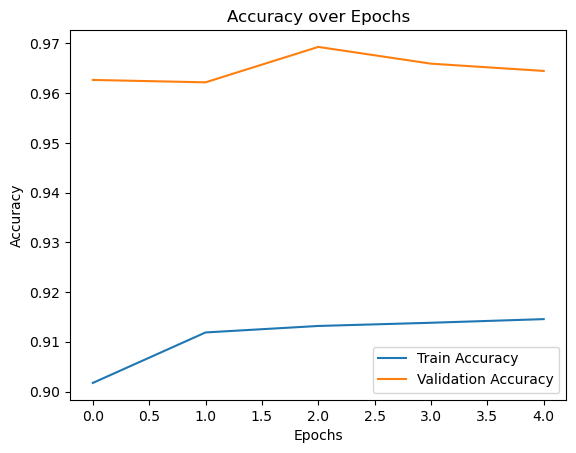

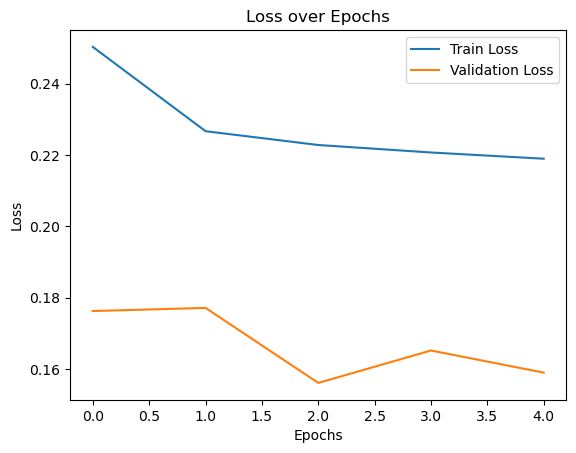

In [867]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [868]:
# Predict probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.986).astype(int)

17367/17367 [==============================] - 29s 2ms/step


In [869]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc_score}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.68      0.69      0.68      2938

    accuracy                           1.00    555719
   macro avg       0.84      0.84      0.84    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
[[551846    935]
 [   924   2014]]
AUC-ROC: 0.9593841927847548


In [731]:
# from sklearn.metrics import roc_curve

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# 5. Save the Model

In [870]:
# Save the model to an H5 file
model.save('models/full_data_6features_fraud_detection_model.h5')

print("Model saved as 'fraud_detection_model.h5'")

Model saved as 'fraud_detection_model.h5'


In [871]:
import joblib
from sklearn.preprocessing import StandardScaler

# Assume you already have a trained StandardScaler object
scaler = StandardScaler()
scaler.fit(X_train)

# Save the scaler to a file
joblib.dump(scaler, 'label/scaler.pkl')
print("StandardScaler saved as 'scaler.pkl'")

StandardScaler saved as 'scaler.pkl'


In [872]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('models/full_data_6features_fraud_detection_model.h5')

In [873]:
def preprocess_and_predict(raw_data, model, encoders, scaler, feature_order):
    """
    Preprocess raw transaction data and predict using a trained model.

    Parameters:
    - raw_data (dict): Dictionary containing raw input data.
    - model: Trained machine learning or deep learning model.
    - encoders (dict): Dictionary of LabelEncoders for categorical features.
    - scaler: Scaler object used during training.
    - feature_order (list): Ordered list of features expected by the model.

    Returns:
    - dict: Prediction results, including fraud probability and classification.
    """
    import numpy as np

    # Step 1: Apply Label Encoding to Categorical Features
    for col, encoder in encoders.items():
        if col in raw_data:
            try:
                raw_data[col] = encoder.transform([raw_data[col]])[0]
            except ValueError:
                raw_data[col] = -1  # Default value for unseen categories
        else:
            raw_data[col] = -1  # Default value for missing features

    # Step 2: Fill Missing Features with Default Values
    for feature in feature_order:
        if feature not in raw_data:
            raw_data[feature] = 0  # Default value for missing features

    # Step 3: Arrange Data in the Correct Feature Order
    input_data = [raw_data[feature] for feature in feature_order]

    # Step 4: Scale Numerical Data
    input_data_scaled = scaler.transform([input_data])  # Ensure input is 2D

    # Step 5: Make Prediction
    prediction = model.predict(input_data_scaled)
    fraud_probability = prediction[0][0]
    is_fraud = fraud_probability > 0.005 # Default threshold of 0.5

    # Step 6: Return Results
    return {
        "fraud_probability": fraud_probability,
        "is_fraud": is_fraud,
    }

In [874]:
raw_transaction = {
    'category': 'grocery_pos',
    'amt': 281.06,
    'gender': 'F',
    'city': 'Collettsville',
    'age': 36,
    'unix_time': 1546391197,
}

In [1]:
from sklearn.preprocessing import StandardScaler
import joblib
    

# Load LabelEncoders
encoders = joblib.load('label/6label_encoders.pkl')  # Replace with your encoder path



# Load StandardScaler
scaler = joblib.load('label/6scaler.pkl')  # Replace with your scaler path


# Define feature order
feature_order = [
    'category',  'amt', 'gender', 'city', 'unix_time','age'
]

FileNotFoundError: [Errno 2] No such file or directory: 'label/6label_encoders.pkl'

### make prediction

In [876]:
result = preprocess_and_predict(
    raw_data=raw_transaction,
    model=model,
    encoders=encoders,
    scaler=scaler,
    feature_order=feature_order
)

print(f"Fraud Probability: {result['fraud_probability']:.2f}")
print("Fraudulent Transaction" if result['is_fraud'] else "Legitimate Transaction")


1/1 [==============================] - 0s 74ms/step
Fraud Probability: 0.19
Fraudulent Transaction
